$$ \Huge Logistic ~ Regression $$
$$Minh ~ Kha$$

In [1]:
%matplotlib inline

In [2]:
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv("handwritten/train.csv")
test  = pd.read_csv("handwritten/test.csv")

print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))

Training set has 42000 rows and 785 columns
Test set has 28000 rows and 784 columns


## Replace label of digits different from 0 to 1

In [4]:
train.loc[train['label'] != 0, 'label'] = 1
print(train)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          1       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          1       0       0       0       0       0       0       0       0   
7          1       0       0       0       0       0       0       0       0   
8          1       0       0       0       0       0       0       0       0   
9          1       0       0       0       0       0       0       0       0   
10         1       0       0       0       0       0       0       0       0   
11         1       0       0       0    

### Divide the train data into two set: 80% for training_set, 10% for validation_set

In [5]:
training_set, validation_set = train_test_split(train, train_size=0.8, test_size=0.2, shuffle=True)
print(training_set.shape)
print(validation_set.shape)

(33600, 785)
(8400, 785)


In [6]:
trainlabels = np.asmatrix(training_set.loc[:, 'label'])
traindata = np.asmatrix(training_set.loc[:,'pixel0':])
print(trainlabels.shape)
print(traindata.shape)

(1, 33600)
(33600, 784)


In [7]:
validation_labels = np.asmatrix(validation_set.loc[:, 'label'])
validation_data = np.asmatrix(validation_set.loc[:, 'pixel0':])
print(validation_labels.shape)
print(validation_data.shape)

(1, 8400)
(8400, 784)


In [8]:
def show_image(index, labels, data):
    print("Label: ", 0 if labels[0, index] < 0 else 'Not 0')
    samplerow = data[index:index+1]
    samplerow = np.reshape(samplerow,(28,28))
    plt.imshow(samplerow)

Label:  Not 0


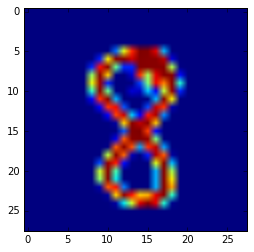

In [9]:
show_image(1997, trainlabels, traindata)

In [10]:
train_bar = np.concatenate((np.ones((traindata.shape[0], 1)), traindata), axis=1)
print(train_bar.shape)

(33600, 785)


In [74]:
# https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/

# def sigmoid(s):
#     return 1/(1 + np.exp(-s))

# def exp_normalize(x, b):
#     b = x.max()
#     return np.exp(x - b)

def sigmoid(s):
    if s >= 0:
        z = np.exp(-s)
        return 1/(1 + z)
    else:
        z = np.exp(s)
        return z/(1 + z)
        

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape((d, 1))
            yi = y[0, i]
            zi = sigmoid(w[-1].T @ xi)
            zi = zi[0, 0]
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            if count%check_w_after == 0:
                print(np.linalg.norm(w_new - w[-check_w_after]))
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    print("!!!")
                    print(count)
                    return w
            w.append(w_new)
            
    return w

In [75]:
dimen = traindata.shape[1]
eta = 0.9
w_init = np.random.randn(dimen, 1)
y = np.asmatrix(trainlabels)

In [77]:
w = logistic_sigmoid_regression(traindata.T, y, w_init, eta)
print(w[-1])
print(w[-1].shape)

2295.49194727
0.0
!!!
40
[[ -9.09804448e-01]
 [ -1.31103372e-01]
 [  1.23600798e+00]
 [  1.64678396e+00]
 [ -1.17727424e+00]
 [ -2.48994289e+00]
 [  9.07205680e-02]
 [ -1.50772073e+00]
 [  2.02553799e-02]
 [ -1.12414251e-01]
 [ -1.60718295e+00]
 [ -3.40718222e-01]
 [  1.87326583e+00]
 [  1.02819343e+00]
 [  1.16014855e-01]
 [  2.34302217e-01]
 [ -2.32147187e+00]
 [  2.33670153e-01]
 [  5.60981135e-01]
 [  4.88742900e-01]
 [ -1.77616907e+00]
 [ -6.14697752e-01]
 [ -9.65049014e-01]
 [ -1.98339688e+00]
 [ -2.13049329e+00]
 [  1.07342136e+00]
 [ -2.12139180e+00]
 [  9.05474900e-02]
 [  2.83451563e-01]
 [  1.34142081e+00]
 [  4.36799403e-01]
 [  4.24389489e-01]
 [ -1.07044419e-01]
 [ -1.29894398e+00]
 [  5.40235279e-01]
 [ -8.28033006e-01]
 [ -4.60170804e-01]
 [  2.59033749e-01]
 [  1.33728778e-01]
 [ -1.35300354e+00]
 [  1.05809121e+00]
 [  9.71756845e-01]
 [  1.63086744e-01]
 [  3.95018395e-01]
 [  4.50523190e-01]
 [ -7.21132024e-01]
 [ -7.49149983e-01]
 [ -1.35804759e+00]
 [  1.39109344e

In [78]:
w = np.array(w[-1]).reshape((dimen, 1))
print(w.shape)

(784, 1)


### Validate and calculate accuracy

In [84]:
def predict(w, x):
#     print(sigmoid(w.T @ x))
    return 'Not 0' if sigmoid(w.T @ x) > 0 else 0

def calc_validation_stats(labels, data, w):
    mis_validation_points = 0
#     print(labels.shape)
#     print(data.shape)
#     print(w.shape)
    for index in range(data.shape[0]):
#         clear_output()
        predicted_digit = predict(w, data[index:index+1].T)
        actual_digit = 0 if labels[0, index] == 0 else 'Not 0'
        
#         print('Predicted Digit: ', predicted_digit)
#         print('Expected Digit: ', actual_digit)
#         show_image(index, labels, data)
#         plt.show()
#         time.sleep(1)
        
        if(predicted_digit != actual_digit):
            mis_validation_points += 1
            
        accuracy = mis_validation_points / labels.shape[1]
    
    return (mis_validation_points, accuracy)
    
(mis_validation_points, accuracy) = calc_validation_stats(validation_labels, validation_data, w)
print(mis_validation_points)
print('Accuracy: ', 100 - np.round(accuracy*100, 2), '%')

864
Accuracy:  89.71 %


### Test for test set

In [85]:
def show_test_image(index, data):
    samplerow = data[index:index+1]
    samplerow = np.reshape(samplerow,(28,28))
    plt.imshow(samplerow)

In [86]:
test_data = np.asmatrix(test.loc[:,:])
print(test_data.shape)

(28000, 784)


Predicted Digit:  Not 0
Expected Digit: 


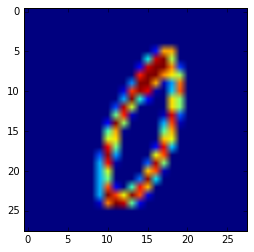

In [90]:
index = 1997
print('Predicted Digit: ', predict(w[:, -1:], test_data[index:index+1].T))
print('Expected Digit: ')
show_test_image(index, test_data)